In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

import cv2
from PIL import Image

In [2]:
class VideoRecord(object):
    def __init__(self, video_path, label):
        self.path = video_path
        self.video = cv2.VideoCapture(self.path)
        self.num_frames = self._get_num_frames()
        self.label = label

    def _get_num_frames(self):
        count = 0
        success, frame = self.video.read()
        while(success):
            success, frame = self.video.read()
            count += 1
        self.video.set(2, 0)
        return count

    def get_frames(self, indices):
        """
        Argument:
            indices : Sorted list of frames indices
        Returns:
            images : Dictionary in format {frame_id: PIL Image}
        """
        images = dict()
        self.video.set(cv2.CAP_PROP_POS_FRAMES, min(indices))
        for count in range(min(indices), max(indices)+1):
            success, frame = self.video.read()
            if success is False:
                print('\nCould not load frame {} from video {}\n'.format(count, self.path))
                return None

            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            if count in indices:
                images[count] = Image.fromarray(frame)

        return images


In [3]:
def parse_list(list_file):
        video_list = []
        with open(list_file) as f:
            reader = csv.DictReader(f)
            for row in reader:
                vid = row['id']
                actions = row['actions']
                if actions == '':
                    actions = []
                else:
                    actions = [a.split(' ') for a in actions.split(';')]
                    actions = [{'class': x, 'start': float(
                        y), 'end': float(z)} for x, y, z in actions]
                video_list.append([actions, vid])
                
        return video_list

In [4]:
train_file = '/media/v-pakova/New Volume/Datasets/Charades/Annotations/Charades_v1_train.csv'
root_path = '/media/v-pakova/New Volume/Datasets/Charades/Charades_v1_480'
num_classes = 157
FPS = 24

video_list = parse_list(train_file)

In [5]:
targets = np.zeros((len(video_list), num_classes))
actual_targets = np.zeros((len(video_list), num_classes))
for i, (label, video_path) in enumerate(video_list):
    if i%100 == 0:
        print(i)
    record = VideoRecord(os.path.join(root_path, video_path+'.mp4'), label)
    for l in label:
        targets[i, int(l['class'][1:])] = 1
        
        frame_start = int(l['start'] * FPS)
        if frame_start < record.num_frames:
            actual_targets[i, int(l['class'][1:])] = 1

np.stack(actual_targets)

per_label_sum = np.sum(targets, axis=0)
actual_per_label_sum = np.sum(actual_targets, axis=0)


weights = max(per_label_sum) / per_label_sum

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900


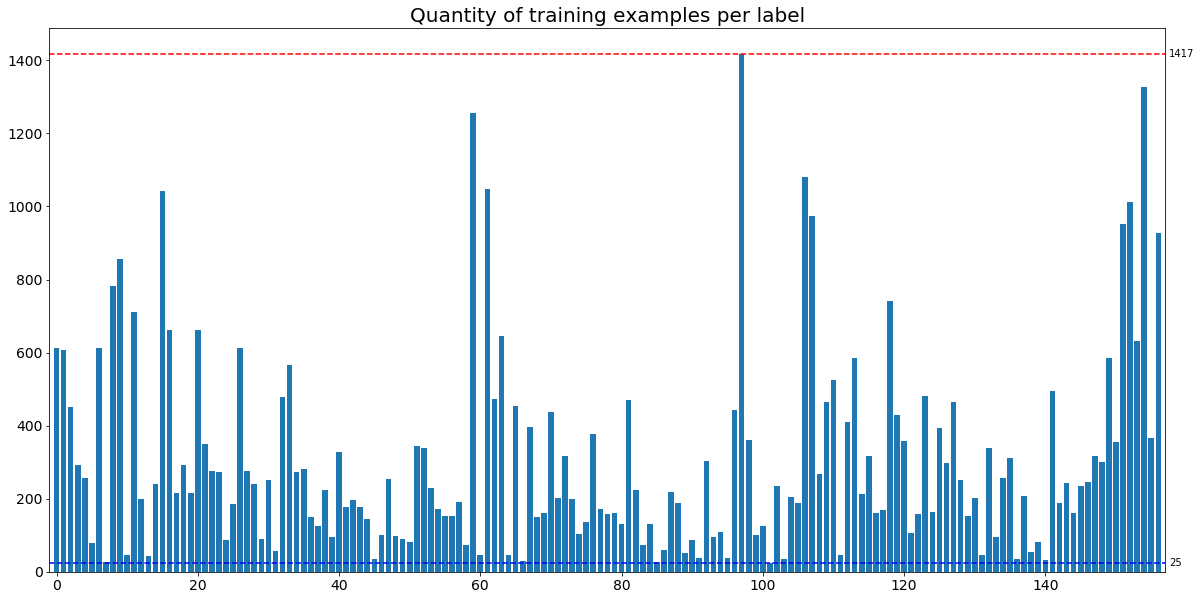

In [6]:
x = np.arange(num_classes)

plt.figure(figsize=(20,10))
plt.bar(x, per_label_sum)
plt.xlim(-1, num_classes)

plt.axhline(max(per_label_sum), linestyle='--', color='r')
plt.axhline(min(per_label_sum), linestyle='--', color='b')
    
l, r = plt.xlim()
plt.text(r+.5, max(per_label_sum), int(max(per_label_sum)), va='center', ha="left")
plt.text(r+.5, min(per_label_sum), int(min(per_label_sum)), va='center', ha="left")

plt.title('Quantity of training examples per label', fontsize=20)
plt.tick_params(labelsize=14)

plt.show()

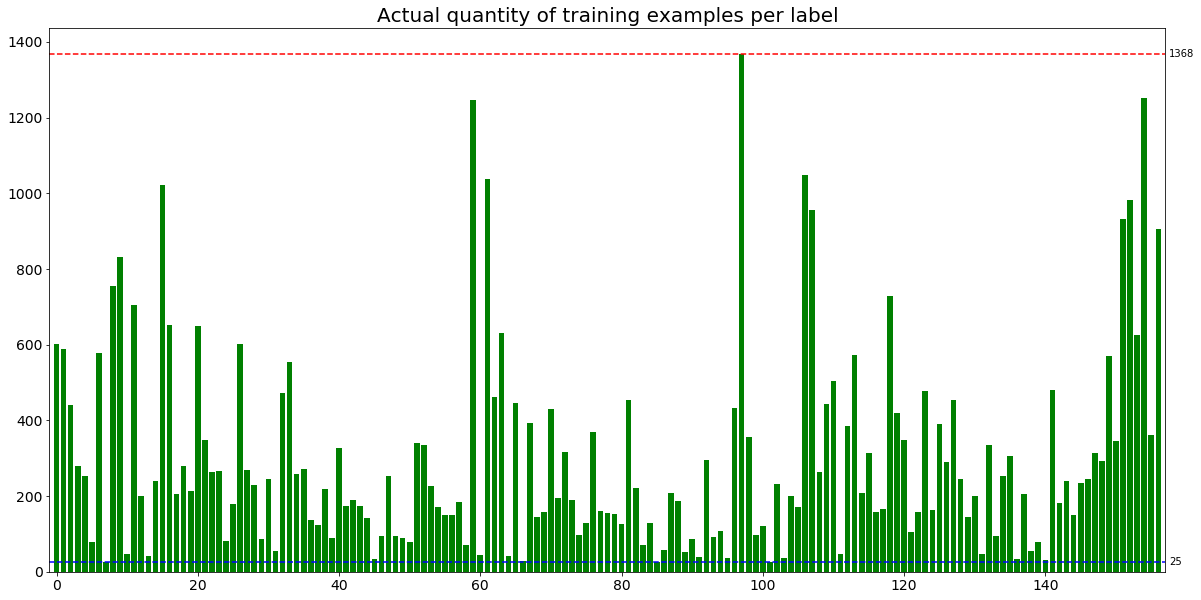

In [7]:
x = np.arange(num_classes)

plt.figure(figsize=(20,10))
plt.bar(x, actual_per_label_sum, color='g')
plt.xlim(-1, num_classes)

plt.axhline(max(actual_per_label_sum), linestyle='--', color='r')
plt.axhline(min(actual_per_label_sum), linestyle='--', color='b')
    
l, r = plt.xlim()
plt.text(r+.5, max(actual_per_label_sum), int(max(actual_per_label_sum)), va='center', ha="left")
plt.text(r+.5, min(actual_per_label_sum), int(min(actual_per_label_sum)), va='center', ha="left")

plt.title('Actual quantity of training examples per label', fontsize=20)
plt.tick_params(labelsize=14)

plt.show()

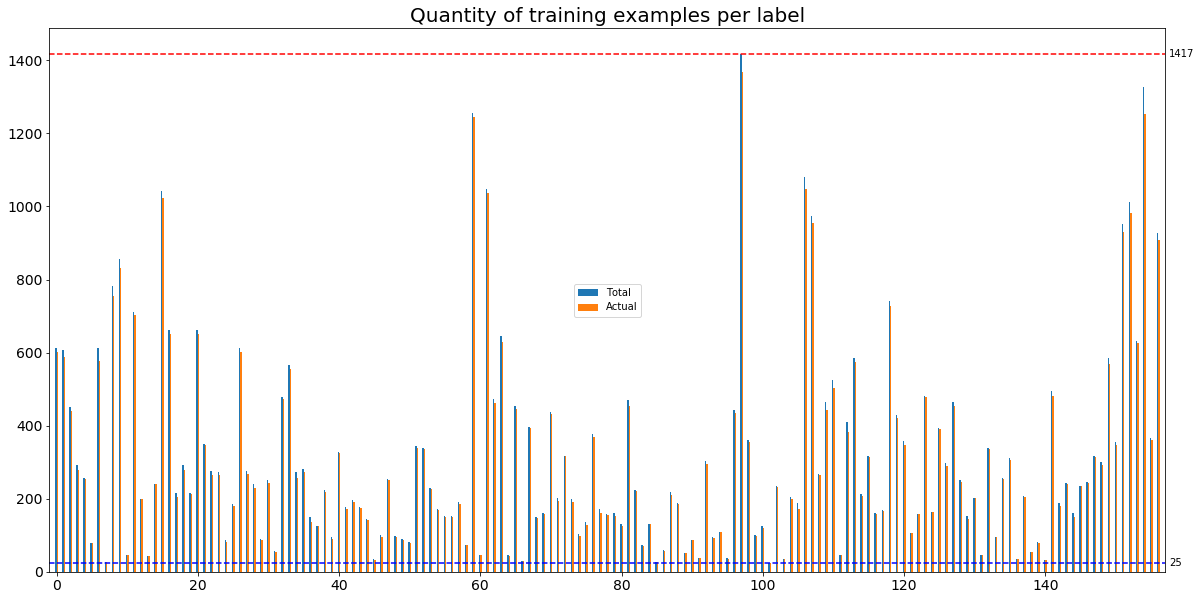

In [11]:
x = np.arange(num_classes)

plt.figure(figsize=(20,10))
# plt.bar(x, per_label_sum)
plt.xlim(-1, num_classes)

width = 0.2  # the width of the bars

rects1 = plt.bar(x - width/2, per_label_sum, width, label='Total')
rects2 = plt.bar(x + width/2, actual_per_label_sum, width, label='Actual')

plt.legend()

plt.axhline(max(per_label_sum), linestyle='--', color='r')
plt.axhline(min(per_label_sum), linestyle='--', color='b')
    
l, r = plt.xlim()
plt.text(r+.5, max(per_label_sum), int(max(per_label_sum)), va='center', ha="left")
plt.text(r+.5, min(per_label_sum), int(min(per_label_sum)), va='center', ha="left")

plt.title('Quantity of training examples per label', fontsize=20)
plt.tick_params(labelsize=14)

plt.show()

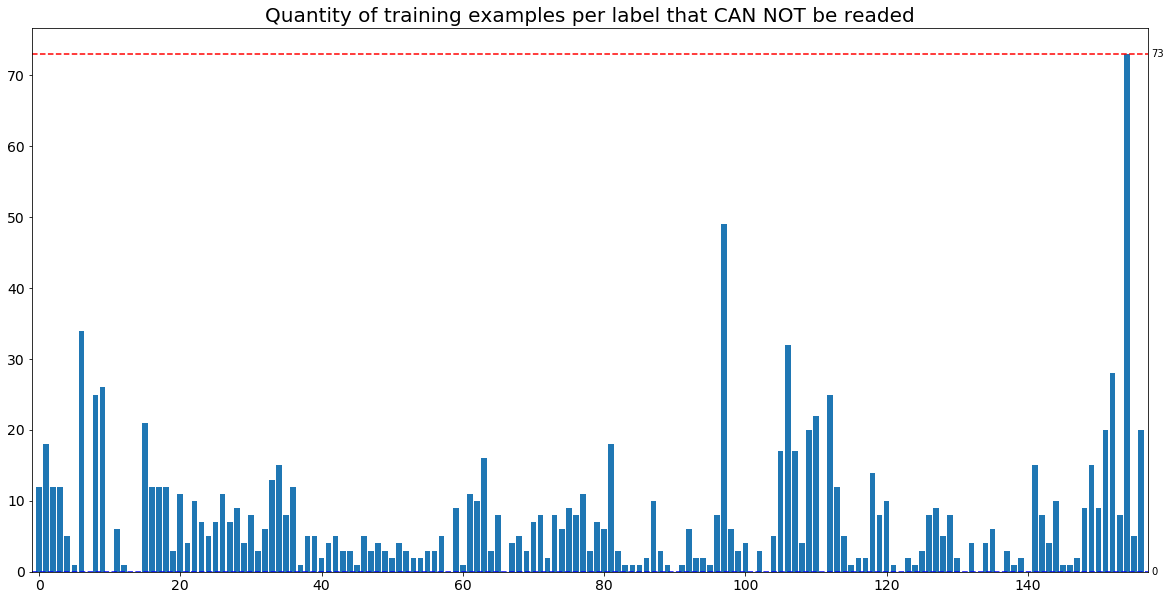

In [10]:
x = np.arange(num_classes)

diff = per_label_sum - actual_per_label_sum

plt.figure(figsize=(20,10))
plt.bar(x, diff)
plt.xlim(-1, num_classes)

plt.axhline(max(diff), linestyle='--', color='r')
plt.axhline(min(diff), linestyle='--', color='b')
    
l, r = plt.xlim()
plt.text(r+.5, max(diff), int(max(diff)), va='center', ha="left")
plt.text(r+.5, min(diff), int(min(diff)), va='center', ha="left")

plt.title('Quantity of training examples per label that CAN NOT be readed', fontsize=20)
plt.tick_params(labelsize=14)

plt.show()

In [19]:
print('Annotated labels: {} | Readable labels: {} ({:.2f}%) | Diff: {}'.format(
    sum(per_label_sum), sum(actual_per_label_sum), sum(actual_per_label_sum)*100/sum(per_label_sum), sum(diff), ))

Annotated labels: 48684.0 | Readable labels: 47511.0 (97.59%) | Diff: 1173.0


In [20]:
len_labels = []
for i, (label, video_path) in enumerate(video_list):
    len_labels.append(len(label))
    
len_labels = sorted(len_labels)

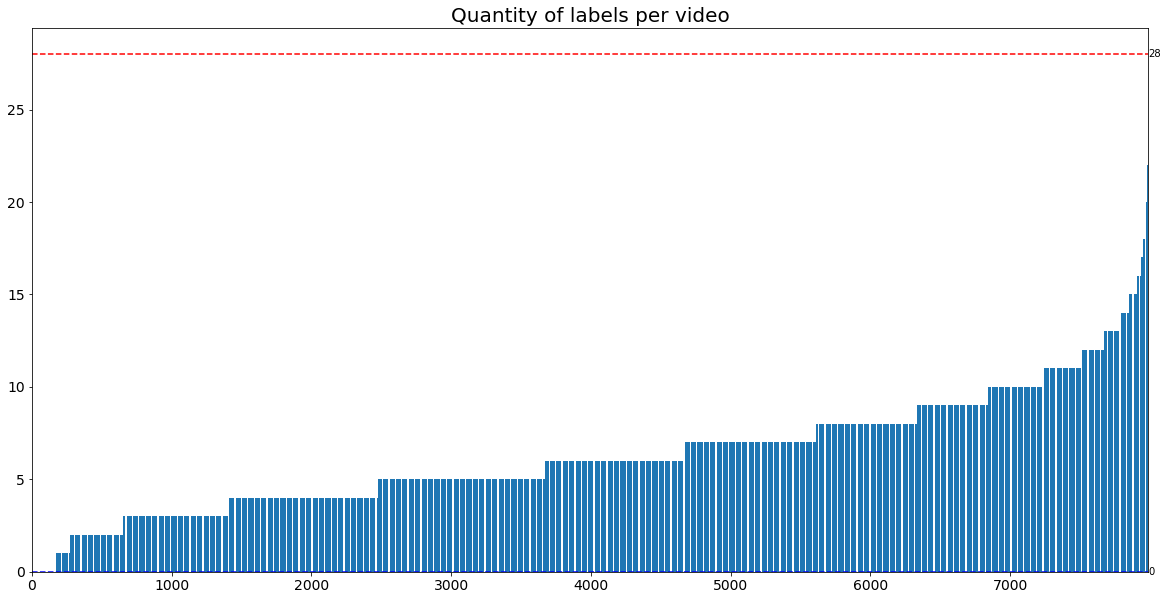

In [21]:
x = np.arange(len(video_list))

plt.figure(figsize=(20,10))
plt.bar(x, len_labels)
plt.xlim(0, len(video_list)+1)

plt.axhline(max(len_labels), linestyle='--', color='r')
plt.axhline(min(len_labels), linestyle='--', color='b')
    
l, r = plt.xlim()
plt.text(r+.5, max(len_labels), int(max(len_labels)), va='center', ha="left")
plt.text(r+.5, min(len_labels), int(min(len_labels)), va='center', ha="left")

plt.title('Quantity of labels per video', fontsize=20)
plt.tick_params(labelsize=14)

plt.show()

In [49]:
len_labels.index(11)

7233

In [44]:
len(len_labels)

7985

In [47]:
len_labels[7983]

22